# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis.

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [1]:
import pandas as pd  # pandas es usado para manipulación y análisis de datos. Puedes cargar, preparar, manipular y analizar datos usando pandas.

import numpy as np  # numpy se utiliza para operaciones matemáticas y lógicas avanzadas, especialmente en arreglos o matrices de datos.

from scipy.stats import pearsonr, chi2_contingency  # scipy.stats es un módulo de la librería SciPy con un gran número de distribuciones de probabilidad, así como una creciente biblioteca de funciones estadísticas.
# pearsonr se utiliza para calcular la correlación de Pearson entre dos conjuntos de datos.
# chi2_contingency se utiliza para realizar una prueba de Chi cuadrado de independencia.

import matplotlib.pyplot as plt  # matplotlib.pyplot se utiliza para crear figuras y gráficos. Con ella puedes crear una gran cantidad de gráficos y personalizar cada aspecto de ellos.

import seaborn as sns  # seaborn es una librería de visualización de datos en Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos.

from tabulate import tabulate # Es para la impresion de estas lineas ---- en los cuadros, simplemente para hacer mas facil la lectura

In [2]:
#to make the output look nicer
#           set_printoptions ajusta la forma en que los arrays de numpy se imprimen.
#           suppress=True evita la notación científica para números pequeños. ex istead of  3e -4 we gonna have 0.000003 
#           precision=2 limita la salida a 2 decimales.
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


Game id:

Year id:

 <span style="font-family:Arial">
 <span style="color:#ADD8E6">Fran_id</span> Id de franquicia. Múltiples team_ids pueden caer bajo el mismo fran_id debido a cambios de nombre o movimientos. El interactivo se agrupa por fran_id.

<span style="color:#ADD8E6">game_location</span>: Locacion del juego: <span style="color:#FF8080">Home (H), Away(A), Neutral(N)</span>

<span style="color:#ADD8E6">is_playoffs</span>:  la temporada regular es seguida por las series de playoffs, como la champios <span style="color:#FF8080">(0, 1)</span>

<span style="color:#ADD8E6">pts</span>: Puntos Marcados por el equipo

<span style="color:#ADD8E6">opp_pts</span> : Puntos marcados por el oponente

<span style="color:#ADD8E6">game_result</span>: Resultado del Juego <span style="color:#FF8080">W (WIN) L(LOSS)</span> for the team in the colum

<span style="color:#ADD8E6">point_diff</span> : Diferencia de puntos en base al equipo de la columna
</span>

In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [5]:
#knicks is a team of NBA, im not roll into.
knicks_pts = nba_2010.pts[nba_2010.fran_id =='Knicks']
nets_pts = nba_2010.pts[nba_2010.fran_id =='Nets']

#tabulate en un objeto de tipo Serie de Pandas que no es iterable. tabulate necesita un objeto iterable para funcionar, como una lista o un DataFrame de Pandas.
#knicks_pts_df = pd.DataFrame(knicks_pts)
#nets_pts_df = pd.DataFrame(nets_pts)

#(tabulate(knicks_pts_df, headers = 'keys', tablefmt = 'psql'))
#(tabulate(nets_pts_df, headers = 'keys', tablefmt = 'psql'))
print(knicks_pts)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64


### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


In [6]:
knicks_pts_mean = knicks_pts.mean()
nets_pts_mean = nets_pts.mean()

mean_pts_diff = knicks_pts_mean - nets_pts_mean

print(mean_pts_diff)

9.731707317073173


### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


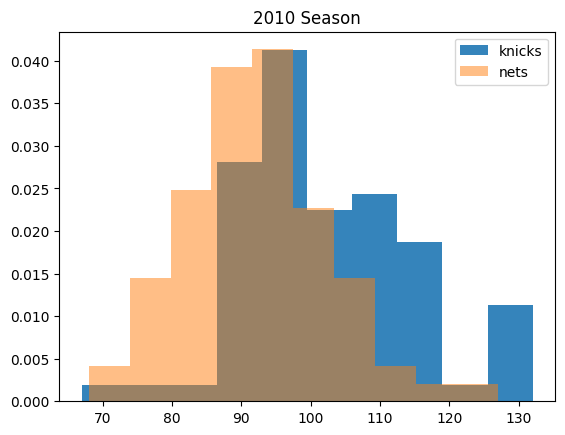

In [7]:
# plt.hist() es una función de matplotlib que genera un histograma. Un histograma es un gráfico que muestra la distribución de los datos.
# knicks_pts es la lista de puntos para el equipo Knicks. Los datos de esta lista se representarán en el histograma.

plt.hist(knicks_pts, 
         alpha=0.9, # El parámetro alpha controla la transparencia de la trama. Cuanto más cercano sea el valor a 0, más transparente será el gráfico.
         density=True, # Si es True, la primera coordenada de los datos devueltos será normalizada para formar una densidad de probabilidad.
         label='knicks') # El label es el nombre que se mostrará en la leyenda del gráfico para este conjunto de datos.
                        #Al establecer density=True, estás cambiando la interpretación de la altura de las barras. 
# Ahora estamos haciendo lo mismo pero para el equipo de los Nets.

plt.hist(nets_pts, 
         alpha=0.5, 
         density=True,
         label='nets')

# plt.legend() es una función de matplotlib que genera una leyenda para el gráfico. La leyenda es una descripción de los elementos del gráfico.

plt.legend()

# plt.title() es una función que establece un título para el gráfico.

plt.title("2010 Season")

# plt.show() muestra el gráfico que hemos estado construyendo con las funciones anteriores. Hasta que no se llame a esta función, el gráfico no se mostrará.

plt.show()

Esto podría sugerir varias cosas, dependiendo del contexto. Por ejemplo, en el caso de los puntajes de los equipos de baloncesto, si el histograma de un equipo está más sesgado a la derecha, podría sugerir que ese equipo tiene una tendencia a anotar más puntos en los partidos (ya que hay más juegos con puntajes altos). Por otro lado, un histograma más en forma de campana podría sugerir que los puntajes de ese equipo son más predecibles y se centran más alrededor de la media.

Es importante recordar que, aunque estas interpretaciones pueden ser útiles, siempre deben tomarse con cautela y considerarse dentro del contexto más amplio de los datos y la situación que estás analizando.

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


0.44706798131809933


[]

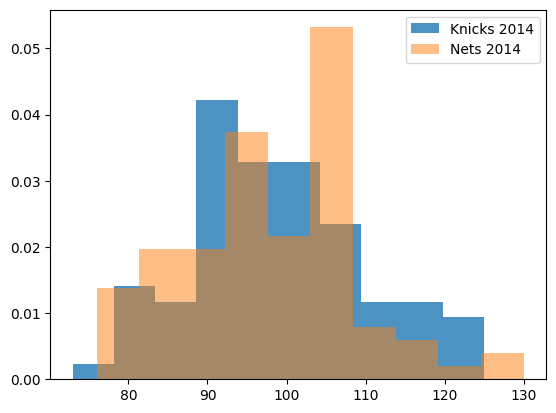

In [8]:
knicks_pts_2014 = nba_2014.pts[nba_2014.fran_id =='Knicks']
nets_pts_2014 = nba_2014.pts[nba_2014.fran_id =='Nets']

knicks_pts_mean_14 = knicks_pts_2014.mean()
nets_pts_mean_14 = nets_pts_2014.mean()

mean_pts_diff_14 = knicks_pts_mean_14 - nets_pts_mean_14

print(mean_pts_diff_14)


plt.hist(knicks_pts_2014, alpha = 0.8, density= True, label = 'Knicks 2014') 
plt.hist(nets_pts_2014, alpha = 0.5, density= True, label = 'Nets 2014')
plt.legend()

plt.plot()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


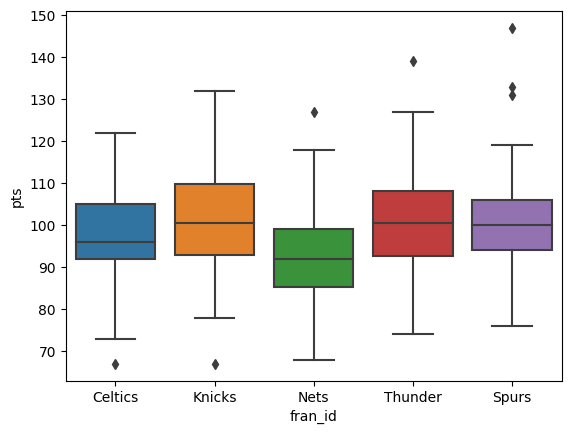

In [26]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

Si la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.
Si la mediana corta la caja en dos lados desiguales se tiene:
Asimetría positiva o segada a la derecha si la parte más larga de la caja es la parte superior a la mediana. Los datos se concentran en la parte inferior de la distribución. La media suele ser mayor que la mediana.
Asimetría negativa o sesgada a la izquierda si la parte más larga es la inferior a la mediana. Los datos se concentran en la parte superior de la distribución. La media suele ser menor que la mediana.

<span style="color:#FF8080">Ojo! Porque un lado de la caja sea más largo que otro, no quiere decir que ese lado contenga más datos. Indica un rango más amplio,</span>


Box plot como el resumen de 5 puntos, valor minimo, del cuartil 1, de la mediana, del cuartil 3 y del valor maximo, 5 datos.

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [27]:
#print(nba_2010.game_result.describe())
#print(nba_2010.game_location.unique())

location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq = location_result_freq.rename(columns ={'A': "AWAY" , 'H':'HOME'},
                                                    index={"L":"LOSS", "W": "WIN"})
print(location_result_freq/len(nba_2010))
#print(type(location_result_freq/len(nba_2010)))

game_location      AWAY      HOME
game_result                      
LOSS           0.295556  0.233333
WIN            0.204444  0.266667


### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [25]:
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_location      AWAY      HOME
game_result                      
LOSS           0.295556  0.233333
WIN            0.204444  0.266667


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [38]:
#tabla de contingencia
print(location_result_freq)

chi2, p, dof, expected = chi2_contingency(location_result_freq)
print(f" \n El valor de chi2 es de {chi2}")
print(f" \n El valor de p es de {p}")

game_location  AWAY  HOME
game_result              
LOSS            133   105
WIN              92   120
 
 El valor de chi es de 6.501704455367053
 
 El valor de p es de 0.010777112875193886


 Si este valor p es menor que un cierto nivel de significancia `(a menudo 0.05)`, entonces rechazamos la hipótesis nula de que no hay asociación entre las variables.

 El valor p que obtuvido es 0.010777112875193886. Este número es menor que 0.05, lo que significa que es bastante raro obtener una puntuación de Chi-Cuadrado de 6.50 simplemente por casualidad en este contexto.

*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We're not there*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [40]:
point_diff_forecast_cov = np.cov(nba_2010.forecast , nba_2010.point_diff)
print(point_diff_forecast_cov)


[[  0.05   1.37]
 [  1.37 186.56]]


 diferencia del coeficiente de correlación, la covarianza no está normalizada, es decir, no tiene un valor máximo y mínimo definido y no puedes usarla para comparar la fuerza de la relación entre variables diferentes. Esta es la razón por la que a menudo es más útil el coeficiente de correlación, ya que proporciona tanto la dirección como la fuerza de la relación entre las dos variables.

Por lo tanto, la covarianza te ayudó a establecer que existe una relación entre 'forecast' y 'point_diff', pero necesitaste el coeficiente de correlación para entender cuán fuerte es esa relación.

In [41]:
# Supongamos que 'forecast' y 'point_diff' son dos Series de pandas
forecast = nba_2010['forecast']
point_diff = nba_2010['point_diff']

# Calcula el coeficiente de correlación
corrcoef = np.corrcoef(forecast, point_diff)

print(corrcoef)

[[1.   0.44]
 [0.44 1.  ]]


### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [44]:
#print(nba_2010.forecast.head())
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

PearsonRResult(statistic=0.4402088708468082, pvalue=9.410391573139846e-23)


### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

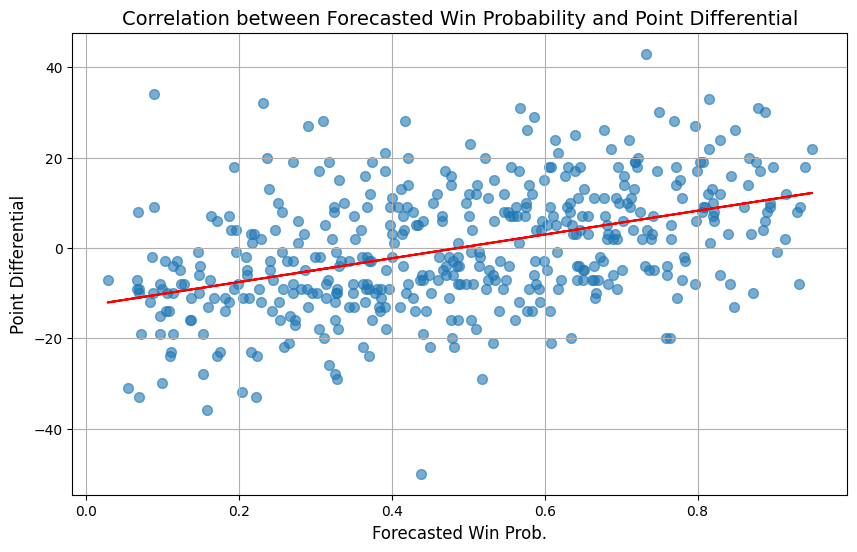

In [48]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.scatter('forecast', 'point_diff', data=nba_2010, s=50, alpha=0.6)  # Aumenta el tamaño de los puntos y agrega transparencia
plt.xlabel('Forecasted Win Prob.', fontsize=12)  # Ajusta el tamaño de la fuente de la etiqueta x
plt.ylabel('Point Differential', fontsize=12)  # Ajusta el tamaño de la fuente de la etiqueta y
plt.title('Correlation between Forecasted Win Probability and Point Differential', fontsize=14)  # Agrega un título
plt.grid(True)  # Agrega una cuadrícula

# Agrega una línea de tendencia
m, b = np.polyfit(nba_2010['forecast'], nba_2010['point_diff'], 1)
plt.plot(nba_2010['forecast'], m*nba_2010['forecast'] + b, color='red')

plt.show()

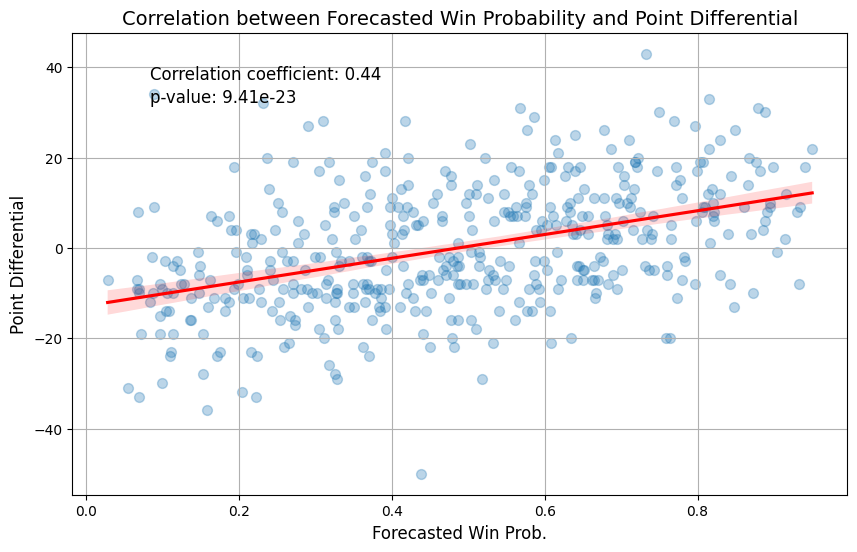

In [52]:

# Calcula el coeficiente de correlación y el valor p
corr, p_value = pearsonr(nba_2010.forecast, nba_2010.point_diff)

plt.figure(figsize=(10, 6))
# Usa la función regplot de seaborn para trazar el gráfico de dispersión con una línea de regresión
sns.regplot(x='forecast', y='point_diff', data=nba_2010, scatter_kws={'s': 50, 'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Forecasted Win Prob.', fontsize=12)
plt.ylabel('Point Differential', fontsize=12)
plt.title('Correlation between Forecasted Win Probability and Point Differential', fontsize=14)
plt.grid(True)

# Anota el gráfico con el coeficiente de correlación y el valor p
plt.text(0.1, 0.9, f'Correlation coefficient: {corr:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

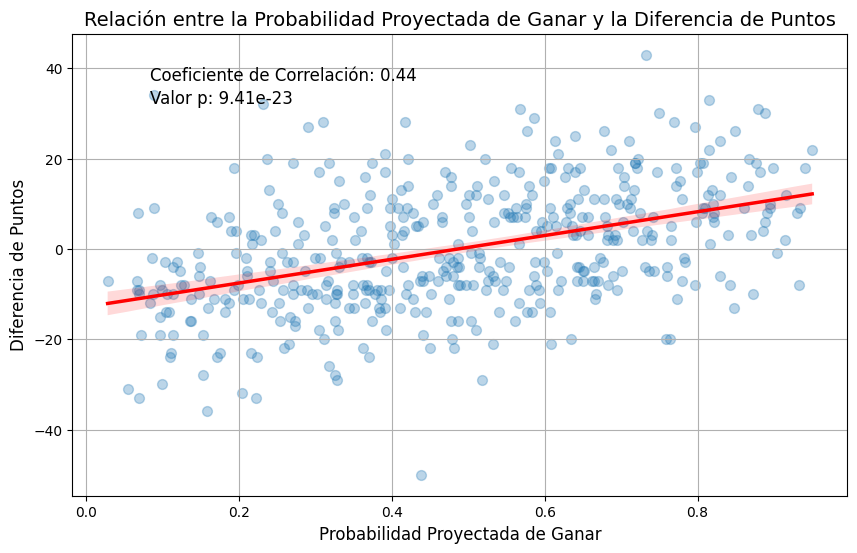

In [51]:


# Calcula el coeficiente de correlación y el valor p
corr, p_value = pearsonr(nba_2010.forecast, nba_2010.point_diff)

# Genera el gráfico
plt.figure(figsize=(10, 6))

sns.regplot(x='forecast', y='point_diff', data=nba_2010, scatter_kws={'s': 50, 'alpha':0.3}, line_kws={'color':'red', 'linewidth': 2.5})

# Ajusta las etiquetas y los títulos para que sean más descriptivos y menos técnicos
plt.xlabel('Probabilidad Proyectada de Ganar', fontsize=12)
plt.ylabel('Diferencia de Puntos', fontsize=12)
plt.title('Relación entre la Probabilidad Proyectada de Ganar y la Diferencia de Puntos', fontsize=14)
plt.grid(True)

# Anota el gráfico con el coeficiente de correlación y el valor p
plt.text(0.1, 0.9, f'Coeficiente de Correlación: {corr:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, f'Valor p: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=12)

plt.show()